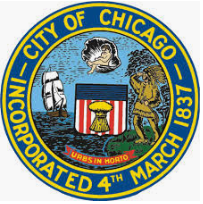

# ETL Project ~ City of Chicago Food Inspections 

## 1. Extract

### 1.1 Extracting Data, from API (JSON) to Pandas

In [1]:
# Dependencies for API access and parsing
#----------------------------------------
import pandas as pd
import requests
import json


In [2]:
# URL that gives access to data
#----------------------------------------
url = 'https://data.cityofchicago.org/resource/cwig-ma7x.json'


In [3]:
print(requests.get(url))

<Response [200]>


In [4]:
# Preview content
#---------------------------------------
print(requests.get(url).json())

[{':@computed_region_43wa_7qmu': '31', ':@computed_region_6mkv_f3dw': '22257', ':@computed_region_awaf_s7ux': '17', ':@computed_region_bdys_3d7i': '432', ':@computed_region_vrxf_vc4k': '65', 'address': '1459 W 74TH ST ', 'city': 'CHICAGO', 'dba_name': "LENORA'S PLACE DAYCARE AND LEARNING CENTER, LLC", 'facility_type': "Children's Services Facility", 'inspection_date': '2019-02-15T00:00:00.000', 'inspection_id': '2262083', 'inspection_type': 'License Re-Inspection', 'latitude': '41.75937734623751', 'license_': '2621936', 'location': {'type': 'Point', 'coordinates': [-87.661115399632, 41.759377346238]}, 'longitude': '-87.66111539963164', 'results': 'Pass w/ Conditions', 'risk': 'Risk 1 (High)', 'state': 'IL', 'violations': '3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL EMPLOYEE; KNOWLEDGE, RESPONSIBILITIES AND REPORTING - Comments: Inspector Comments: OBSERVED NO EMPLOYEE HEALTH POLICY ON SITE AT TIME OF INSPECTION. INSTRUCTED TO PROVIDE AN EMPLOYEE HEALTH POLICY THAT INCLUDES A SIGNED AC

In [5]:
# Pretty Print the output of the JSON
#-----------------------------------------
response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

[
    {
        ":@computed_region_43wa_7qmu": "31",
        ":@computed_region_6mkv_f3dw": "22257",
        ":@computed_region_awaf_s7ux": "17",
        ":@computed_region_bdys_3d7i": "432",
        ":@computed_region_vrxf_vc4k": "65",
        "address": "1459 W 74TH ST ",
        "city": "CHICAGO",
        "dba_name": "LENORA'S PLACE DAYCARE AND LEARNING CENTER, LLC",
        "facility_type": "Children's Services Facility",
        "inspection_date": "2019-02-15T00:00:00.000",
        "inspection_id": "2262083",
        "inspection_type": "License Re-Inspection",
        "latitude": "41.75937734623751",
        "license_": "2621936",
        "location": {
            "coordinates": [
                -87.661115399632,
                41.759377346238
            ],
            "type": "Point"
        },
        "longitude": "-87.66111539963164",
        "results": "Pass w/ Conditions",
        "risk": "Risk 1 (High)",
        "state": "IL",
        "violations": "3. MANAGEMENT, FOOD EM

In [23]:
# Turn JSON 'response' into a Pandas DataFrame
#-----------------------------------------
df = pd.DataFrame(response)
df.head()

:@computed_region_43wa_7qmu :@computed_region_6mkv_f3dw  \
0                            31                       22257   
1                            16                        4451   
2                            22                       22212   
3                            17                       22618   
4                            17                       22618   
5                            46                       14926   
6                            24                        4450   
7                            23                       21572   
8                            14                       21572   
9                            26                       21194   
10                           25                        4449   
11                           25                        4449   
12                           46                       14926   
13                            5                       21853   
14                           25                        4449   
15                           30                        4300   
16                           49                       22615   
17                           25                        4449   
18                          NaN                       16197   
19                           44                       22615   
20                           20                       21849   
21                           22                       21861   
22                           24                        4450   
23                           45                        4299   
24                           20                       21849   
25                           19                       22254   
26                           18                       21849   
27                           36                       21182   
28                           33                       22260   
29                           27                        4450   
..                          ...                         ...   
970                          16                        4451   
971                          36                        4452   
972                          49                       22535   
973                          24                        4450   
974                          22                       22212   
975                          50                       21869   
976                          50                       22618   
977                          48                       14920   
978                          36                       14311   
979                          27                        4450   
980                          10                       21192   
981                          46                       22620   
982                          38                       21869   
983                          10                       14913   
984                           7                       22615   
985                          34                       21190   
986                          44                       22615   
987                          23                       14920   
988                          34                       21190   
989                          24                        4450   
990                          34                       21190   
991                          28                       21569   
992                          10                       14913   
993                          22                       21861   
994                          23                       14917   
995                          39                       22616   
996                          29                       22532   
997                          46                       22620   
998                          23                       14917   
999                          24                        4450   

    :@computed_region_awaf_s7ux :@computed_region_bdys_3d7i  \
0                            17   

## 2. Transform

### 2.1 Column Selection / Formatting / Editing

In [24]:
# Get column names
#-----------------------------------
df.columns

Index([':@computed_region_43wa_7qmu', ':@computed_region_6mkv_f3dw',
       ':@computed_region_awaf_s7ux', ':@computed_region_bdys_3d7i',
       ':@computed_region_vrxf_vc4k', 'address', 'aka_name', 'city',
       'dba_name', 'facility_type', 'inspection_date', 'inspection_id',
       'inspection_type', 'latitude', 'license_', 'location', 'longitude',
       'results', 'risk', 'state', 'violations', 'zip'],
      dtype='object')

In [27]:
#Select useful columns
#-----------------------------------
df = df[['dba_name', 'license_', 'facility_type',
       'risk', 'address', 'zip', 'inspection_date',
       'inspection_type', 'results', 'latitude', 'longitude']]

In [28]:
# Change column names
df.rename(columns={'dba_name': 'business_name', 'license_': 'license'}, inplace=True)
df.head()

business_name  license  \
0  LENORA'S PLACE DAYCARE AND LEARNING CENTER, LLC  2621936   
1                        NOOKIES CAFE & RESTAURANT  2108329   
2               FLAVORFUL GOURMET POPCORN AND MORE  2647032   
3                              SUPERMERCADO MARTIN  2506425   
4                              SUPERMERCADO MARTIN  2631868   

                  facility_type           risk                  address  \
0  Children's Services Facility  Risk 1 (High)          1459 W 74TH ST    
1                    Restaurant  Risk 1 (High)    1100 W BRYN MAWR AVE    
2                 Grocery Store   Risk 3 (Low)          1329 W 99TH ST    
3                 Grocery Store  Risk 1 (High)  5155-5159 W ADDISON ST    
4                 Grocery Store   Risk 3 (Low)  5155-5159 W ADDISON ST    

     zip          inspection_date        inspection_type             results  \
0  60636  2019-02-15T00:00:00.000  License Re-Inspection  Pass w/ Conditions   
1  60660  2019-02-15T00:00:00.000              Complaint  Pass w/ Conditions   
2  60643  2019-02-15T00:00:00.000                License  Pass w/ Conditions   
3  60641  2019-02-15T00:00:00.000  Canvass Re-Inspection                Pass   
4  60641  2019-02-15T00:00:00.000                License                Pass   

             latitude           longitude  
0   41.75937734623751  -87.66111539963164  
1   41.98376648449397  -87.65811162403335  
2  41.713936774508326  -87.65629618912051  
3  41.945895100869734  -87.75664585225653  
4  41.945895100869734  -87.75664585225653

### 2.2 Handling Missing Data

In [29]:
#Print data shape
#---------------------------------------
df.shape

(1000, 11)

In [30]:

# Diagnose missing data (%)
#---------------------------------------
percent_missing = df.isnull().sum()/ len(df) * 100
percent_missing

business_name      0.0
license            0.0
facility_type      1.4
risk               0.1
address            0.0
zip                0.0
inspection_date    0.0
inspection_type    0.0
results            0.0
latitude           0.4
longitude          0.4
dtype: float64

In [31]:
# As the percentage of missing data is small, we'll just get rid of those. 
#-------------------------------------------------------------------------
inspections_complete = df.dropna()
# Review the remaining data
#---------------------------------------
inspections_complete.shape

(982, 11)

In [32]:
# Confirm we have complete data
#---------------------------------------
new_percent_missing = inspections_complete.isnull().sum()/ len(inspections_complete) * 100
new_percent_missing

business_name      0.0
license            0.0
facility_type      0.0
risk               0.0
address            0.0
zip                0.0
inspection_date    0.0
inspection_type    0.0
results            0.0
latitude           0.0
longitude          0.0
dtype: float64

In [33]:
inspections_complete.head(2)

business_name  license  \
0  LENORA'S PLACE DAYCARE AND LEARNING CENTER, LLC  2621936   
1                        NOOKIES CAFE & RESTAURANT  2108329   

                  facility_type           risk                address    zip  \
0  Children's Services Facility  Risk 1 (High)        1459 W 74TH ST   60636   
1                    Restaurant  Risk 1 (High)  1100 W BRYN MAWR AVE   60660   

           inspection_date        inspection_type             results  \
0  2019-02-15T00:00:00.000  License Re-Inspection  Pass w/ Conditions   
1  2019-02-15T00:00:00.000              Complaint  Pass w/ Conditions   

            latitude           longitude  
0  41.75937734623751  -87.66111539963164  
1  41.98376648449397  -87.65811162403335

### 2.3 Formatting Date Time

In [35]:
# The Inspection Data column needs formating
import numpy as np
split = inspections_complete['inspection_date'].str.split('T').str[0]
split.head()

0    2019-02-15
1    2019-02-15
2    2019-02-15
3    2019-02-15
4    2019-02-15
Name: inspection_date, dtype: object

In [36]:
inspections_complete['date'] = split
inspections_complete.head()

/Users/gallasteguicrino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


business_name  license  \
0  LENORA'S PLACE DAYCARE AND LEARNING CENTER, LLC  2621936   
1                        NOOKIES CAFE & RESTAURANT  2108329   
2               FLAVORFUL GOURMET POPCORN AND MORE  2647032   
3                              SUPERMERCADO MARTIN  2506425   
4                              SUPERMERCADO MARTIN  2631868   

                  facility_type           risk                  address  \
0  Children's Services Facility  Risk 1 (High)          1459 W 74TH ST    
1                    Restaurant  Risk 1 (High)    1100 W BRYN MAWR AVE    
2                 Grocery Store   Risk 3 (Low)          1329 W 99TH ST    
3                 Grocery Store  Risk 1 (High)  5155-5159 W ADDISON ST    
4                 Grocery Store   Risk 3 (Low)  5155-5159 W ADDISON ST    

     zip          inspection_date        inspection_type             results  \
0  60636  2019-02-15T00:00:00.000  License Re-Inspection  Pass w/ Conditions   
1  60660  2019-02-15T00:00:00.000              Complaint  Pass w/ Conditions   
2  60643  2019-02-15T00:00:00.000                License  Pass w/ Conditions   
3  60641  2019-02-15T00:00:00.000  Canvass Re-Inspection                Pass   
4  60641  2019-02-15T00:00:00.000                License                Pass   

             latitude           longitude        date  
0   41.75937734623751  -87.66111539963164  2019-02-15  
1   41.98376648449397  -87.65811162403335  2019-02-15  
2  41.713936774508326  -87.65629618912051  2019-02-15  
3  41.945895100869734  -87.75664585225653  2019-02-15  
4  41.945895100869734  -87.75664585225653  2019-02-15

In [37]:
# Now with the new 'Date' column, we can get rid fo the old 'Inspection Date'
#----------------------------------------------------------------------------
del inspections_complete['inspection_date']

#Change the name of 'Date' for 'Inspection Date', this way we keep the old name with the new format
#--------------------------------------------------------------------------------------------------
inspections_complete.rename(columns={'date': 'inspection_date'}, inplace=True)
# Review data frame
inspections_complete.head()

business_name  license  \
0  LENORA'S PLACE DAYCARE AND LEARNING CENTER, LLC  2621936   
1                        NOOKIES CAFE & RESTAURANT  2108329   
2               FLAVORFUL GOURMET POPCORN AND MORE  2647032   
3                              SUPERMERCADO MARTIN  2506425   
4                              SUPERMERCADO MARTIN  2631868   

                  facility_type           risk                  address  \
0  Children's Services Facility  Risk 1 (High)          1459 W 74TH ST    
1                    Restaurant  Risk 1 (High)    1100 W BRYN MAWR AVE    
2                 Grocery Store   Risk 3 (Low)          1329 W 99TH ST    
3                 Grocery Store  Risk 1 (High)  5155-5159 W ADDISON ST    
4                 Grocery Store   Risk 3 (Low)  5155-5159 W ADDISON ST    

     zip        inspection_type             results            latitude  \
0  60636  License Re-Inspection  Pass w/ Conditions   41.75937734623751   
1  60660              Complaint  Pass w/ Conditions   41.98376648449397   
2  60643                License  Pass w/ Conditions  41.713936774508326   
3  60641  Canvass Re-Inspection                Pass  41.945895100869734   
4  60641                License                Pass  41.945895100869734   

            longitude inspection_date  
0  -87.66111539963164      2019-02-15  
1  -87.65811162403335      2019-02-15  
2  -87.65629618912051      2019-02-15  
3  -87.75664585225653      2019-02-15  
4  -87.75664585225653      2019-02-15

### 2.4 Formatting Data Types

In [18]:
# Inspect the data types
#-----------------------------------------
inspections_complete.dtypes

Business_Name       object
License            float64
Facility Type       object
Risk                object
Address             object
Zip                float64
Inspection Type     object
Results             object
Latitude           float64
Longitude          float64
Inspection Date     object
dtype: object

In [38]:
# Convert Floatings to Strings
#-----------------------------------------
# From Float to Integer (to get rid of the decimal) and then to String.
inspections_complete['license'] = inspections_complete['license'].astype(int)
inspections_complete['license'] = inspections_complete['license'].astype(str)

# From Float to Integer (to get rid of the decimal) and then to String.
inspections_complete['zip'] = inspections_complete['zip'].astype(int)
inspections_complete['zip'] = inspections_complete['zip'].astype(str)

# From Float to String
inspections_complete['latitude'] = inspections_complete['latitude'].astype(str)
inspections_complete['longitude'] = inspections_complete['longitude'].astype(str)

#Confirm datatypes
#-----------------------------------------
inspections_complete.dtypes

/Users/gallasteguicrino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/gallasteguicrino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/gallasteguicrino/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

business_name      object
license            object
facility_type      object
risk               object
address            object
zip                object
inspection_type    object
results            object
latitude           object
longitude          object
inspection_date    object
dtype: object

In [39]:
# Print results to confirm that License and Zip do not have decimals and that Long and Lat are text. 
inspections_complete.head()

business_name  license  \
0  LENORA'S PLACE DAYCARE AND LEARNING CENTER, LLC  2621936   
1                        NOOKIES CAFE & RESTAURANT  2108329   
2               FLAVORFUL GOURMET POPCORN AND MORE  2647032   
3                              SUPERMERCADO MARTIN  2506425   
4                              SUPERMERCADO MARTIN  2631868   

                  facility_type           risk                  address  \
0  Children's Services Facility  Risk 1 (High)          1459 W 74TH ST    
1                    Restaurant  Risk 1 (High)    1100 W BRYN MAWR AVE    
2                 Grocery Store   Risk 3 (Low)          1329 W 99TH ST    
3                 Grocery Store  Risk 1 (High)  5155-5159 W ADDISON ST    
4                 Grocery Store   Risk 3 (Low)  5155-5159 W ADDISON ST    

     zip        inspection_type             results            latitude  \
0  60636  License Re-Inspection  Pass w/ Conditions   41.75937734623751   
1  60660              Complaint  Pass w/ Conditions   41.98376648449397   
2  60643                License  Pass w/ Conditions  41.713936774508326   
3  60641  Canvass Re-Inspection                Pass  41.945895100869734   
4  60641                License                Pass  41.945895100869734   

            longitude inspection_date  
0  -87.66111539963164      2019-02-15  
1  -87.65811162403335      2019-02-15  
2  -87.65629618912051      2019-02-15  
3  -87.75664585225653      2019-02-15  
4  -87.75664585225653      2019-02-15

### 2.5 From Pandas DataFrame to SQL

In [40]:
#Dependency
#-----------------------------------
from sqlalchemy import create_engine

#Create Engine
#-----------------------------------
engine = create_engine('sqlite://', echo=False)

#Convert Pandas DataFrame into SQL
#-----------------------------------
inspections_complete.to_sql('inspections', con=engine)

#Perform a SQL Query
#-----------------------------------
engine.execute("SELECT Business_Name, Results FROM inspections").fetchall()

[("LENORA'S PLACE DAYCARE AND LEARNING CENTER, LLC", 'Pass w/ Conditions'),
 ('NOOKIES CAFE & RESTAURANT', 'Pass w/ Conditions'),
 ('FLAVORFUL GOURMET POPCORN AND MORE', 'Pass w/ Conditions'),
 ('SUPERMERCADO MARTIN', 'Pass'),
 ('SUPERMERCADO MARTIN', 'Pass'),
 ('SUBWAY  5183', 'Pass w/ Conditions'),
 ('LITTLE HARVARD ACADEMY', 'Pass w/ Conditions'),
 ('FIFTH CITY CHILD DEVELOPMENT', 'Pass w/ Conditions'),
 ('KEELER FOOD & DELI', 'Fail'),
 ('KAM FUNG RESTAURANT', 'Fail'),
 ('HOME RUN INN', 'Pass'),
 ('RISE UP NUTRITION', 'Pass'),
 ('THE DOG HOUSE GRILL', 'Pass w/ Conditions'),
 ('RISE UP EARLY CHILDHOOD', 'Pass'),
 ('BLAZE IL STORE 1 LLC.', 'Pass w/ Conditions'),
 ('ROSENWALD ELEMENTARY', 'Fail'),
 ('LA BARCA EL TACONAZO', 'Pass w/ Conditions'),
 ('POKE POKE', 'Pass w/ Conditions'),
 ('GARETT POPCORN SHOPS T-5', 'Pass w/ Conditions'),
 ('ARMITAGE GOLD STAR LIQUORS', 'Out of Business'),
 ('GREAT SEA CHINESE RESTAURANT', 'Fail'),
 ('BAJA EXPRESS INN TAQUERIA', 'Pass w/ Conditions'),
 ("B